In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("consolidated_review_rating_april_4.xlsx")

In [4]:
df.head(10)

,industry,comment,rating,manual_rating,Unnamed: 4
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,0
1,Airport,Almost all the restaurants close about 3 so if...,1,1,0
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,0
3,Airport,"It was a Night mare,in every way possible.",1,1,0
4,Airport,"Always busy, wait times are terrible.",1,1,0
5,Airport,Very busy with no stopping had to ride the loo...,1,1,0
6,Airport,You say you are following CDC guidelines and y...,1,1,0
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,0
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,0
9,Airport,Very unorganized and bad customer support,1,1,0


In [5]:
raw_df = df.copy()

In [6]:
df.shape

(15051, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15051 entries, 0 to 15050
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry       15051 non-null  object
 1   comment        15051 non-null  object
 2   rating         15051 non-null  int64 
 3   manual_rating  15051 non-null  int64 
 4   Unnamed: 4     15051 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 588.1+ KB


In [8]:
df = df.rename(columns={ 'Unnamed: 4' : 'diff'})

In [9]:
df.columns

Index(['industry', 'comment', 'rating', 'manual_rating', 'diff'], dtype='object')

In [10]:
df = df.assign(Rating_3P=df['manual_rating'])

In [11]:
df.Rating_3P = df.Rating_3P.replace({5: 3, 4: 3, 3: 2, 2: 1, 1: 1})

In [12]:
df.manual_rating.value_counts()

2    3624
1    3021
5    2941
3    2937
4    2528
Name: manual_rating, dtype: int64

In [13]:
df.Rating_3P.value_counts()

1    6645
3    5469
2    2937
Name: Rating_3P, dtype: int64

# Pre Processing

In [14]:
# replace the string "(Translated by google)" with an empty string
df['comment'] = df['comment'].str.replace('(Translated by Google)', '')

In [15]:
# replace the string "(Original)" with an empty string
df['comment'] = df['comment'].str.replace('(Original)', '')

In [16]:
# Trial
# create a sample DataFrame
dfx = pd.DataFrame({'text': ['This is the (Original) sentence extra text',
                            'Another Original sentence extra text',
                            'Yet another (original) sentence']})

# replace the regular expression pattern with an empty string
dfx['text'] = dfx['text'].str.replace(r'\s*\(\s*Original\s*\).*$', '')

print(dfx)

                                   text
0                           This is the
1  Another Original sentence extra text
2       Yet another (original) sentence


In [17]:
# replace the regular expression pattern with an empty string
df['comment'] = df['comment'].str.replace(r'\s*\(\s*Original\s*\).*$', '')

In [18]:
# Trial
# create a sample DataFrame
dfx = pd.DataFrame({'text': ['This is a sentence with https://example.com',
                            'Another sentence with https://example.org']})

# replace the regular expression pattern with an empty string
dfx['text'] = dfx['text'].str.replace(r'https://\S+', '')

# print the updated DataFrame
print(dfx)

                       text
0  This is a sentence with 
1    Another sentence with 


In [19]:
# replace the regular expression pattern with an empty string
df['comment'] = df['comment'].str.replace(r'https://\S+', '')

In [20]:
# Trial
# create a sample DataFrame
dfx = pd.DataFrame({'text': ['This is **a sentence with **more than two* stars',
                            'Another sentence with one ***star',
                            'Yet another sentence with ****four* stars']})

# replace the regular expression pattern with the word "foul"
dfx['text'] = dfx['text'].str.replace(r'\*{3,}', '(FOUL)')

# print the updated DataFrame
print(dfx)

                                               text
0  This is **a sentence with **more than two* stars
1              Another sentence with one (FOUL)star
2       Yet another sentence with (FOUL)four* stars


In [21]:
# replace the regular expression pattern with the word "foul"
df['comment'] = df['comment'].str.replace(r'\*{3,}', '(FOUL)')

In [22]:
!pip install --upgrade emoji

import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# define a function to replace emoji special characters with words

def replace_emoji(sentence):
    return emoji.demojize(sentence)

# Assuming that the dataframe is named df and the column with sentences is named 'text'
df['comment'] = df['comment'].apply(replace_emoji)

df.head(20)

,industry,comment,rating,manual_rating,diff,Rating_3P
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,0,1
1,Airport,Almost all the restaurants close about 3 so if...,1,1,0,1
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,0,1
3,Airport,"It was a Night mare,in every way possible.",1,1,0,1
4,Airport,"Always busy, wait times are terrible.",1,1,0,1
5,Airport,Very busy with no stopping had to ride the loo...,1,1,0,1
6,Airport,You say you are following CDC guidelines and y...,1,1,0,1
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,0,1
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,0,1
9,Airport,Very unorganized and bad customer support,1,1,0,1


In [24]:
import re

# define a function to extract all words beginning and ending with : in a sentence
def extract_emojis(sentence):
    return re.findall(r':\w+:', sentence)

# apply the function to each sentence in the dataframe
df['Emoji_Extracted'] = df['comment'].apply(extract_emojis)

# show the resulting dataframe
df.head(20)

,industry,comment,rating,manual_rating,diff,Rating_3P,Emoji_Extracted
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,0,1,[]
1,Airport,Almost all the restaurants close about 3 so if...,1,1,0,1,[]
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,0,1,[]
3,Airport,"It was a Night mare,in every way possible.",1,1,0,1,[]
4,Airport,"Always busy, wait times are terrible.",1,1,0,1,[]
5,Airport,Very busy with no stopping had to ride the loo...,1,1,0,1,[]
6,Airport,You say you are following CDC guidelines and y...,1,1,0,1,[]
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,0,1,[]
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,0,1,[]
9,Airport,Very unorganized and bad customer support,1,1,0,1,[]


In [25]:
# Remove exact duplicates which are exactly same in the Statements column of the dataframe
df = df.drop_duplicates(subset='comment')

In [26]:
# abbreviate shortforms of words in sentences in a dataframe column using a contractions package 
! pip install contractions
import pandas as pd
import contractions

# define a function to abbreviate the contractions in each sentence
def abbreviate_contractions(sentence):
    return contractions.fix(sentence)

# apply the function to the 'sentences' column using the apply method
df['Abbreviated_comment'] = df['comment'].apply(abbreviate_contractions)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# print the result
df.iloc[100:141]

,industry,comment,rating,manual_rating,diff,Rating_3P,Emoji_Extracted,Abbreviated_comment
100,Airport,Worst major city Airport in America.,1,1,0,1,[],Worst major city Airport in America.
101,Airport,An international airport where all of the rest...,1,1,0,1,[:trade_mark:],An international airport where all of the rest...
102,Airport,At 8pm on a Saturday evening most places where...,1,1,0,1,[],At 8pm on a Saturday evening most places where...
103,Airport,TSA not friendly.\n\nI parked my car there for...,1,1,0,1,[],TSA not friendly.\n\nI parked my car there for...
105,Airport,I hate using this airport. I have traveled thr...,1,1,0,1,[],I hate using this airport. I have traveled thr...
106,Airport,One of the most complicated airports you will ...,1,1,0,1,[],One of the most complicated airports you will ...
107,Airport,"The black lady ""helping"" at the check in kiosk...",1,1,0,1,[],"The black lady ""helping"" at the check in kiosk..."
108,Airport,Security was okay but Alejandra in the car ren...,1,1,0,1,[],Security was okay but Alejandra in the car ren...
109,Airport,So.....concourse C. As of 9 pm EST there are N...,1,1,0,1,[],So.....concourse C. As of 9 pm EST there are N...
110,Airport,All restaurants and shops closed at 9pm!! Land...,1,1,0,1,[],All restaurants and shops closed at 9pm!! Land...


# EDA

In [28]:
# Create Count Plot
plt.figure(figsize=(6,5))

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

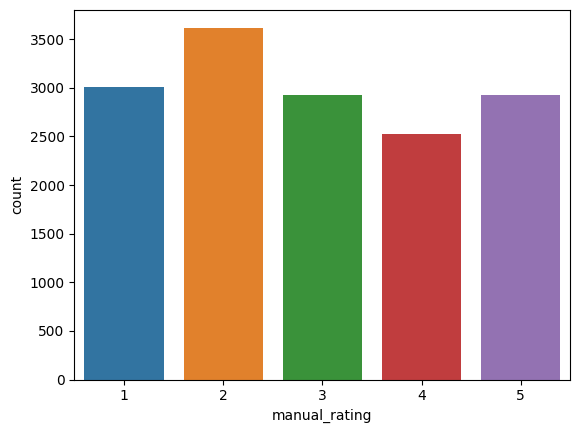

In [29]:
ax = sns.countplot( x='manual_rating',data=df)

In [30]:
# Create wordclouds
# !pip install wordcloud
from wordcloud import WordCloud

In [31]:
# combine all the sentences in the 'text' column into a single string for overall sentences
text = " ".join(sentence for sentence in df["comment"])
wordcloud = WordCloud().generate(text)

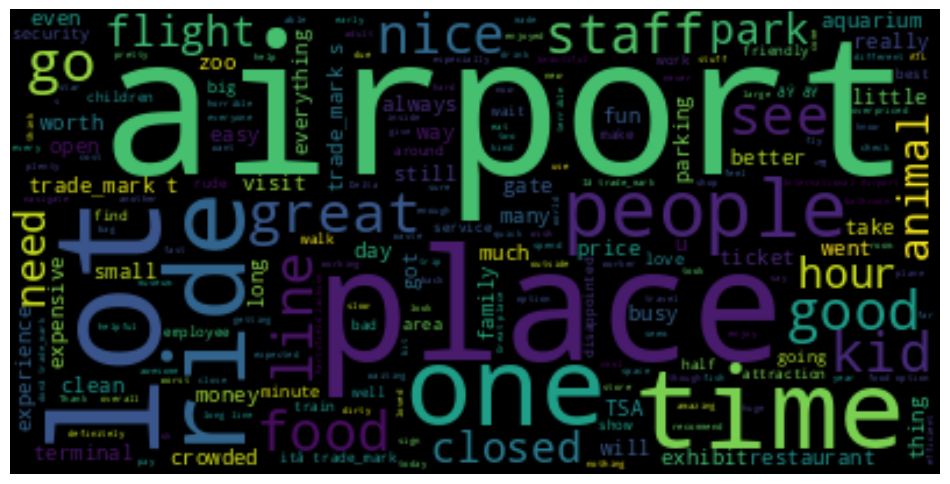

In [32]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
# combine all the sentences in the 'text' column into a single string with a filter column

df_filtered = df[df["Rating_3P"] == 1]
text = " ".join(sentence for sentence in df_filtered["comment"])
wordcloud = WordCloud().generate(text)

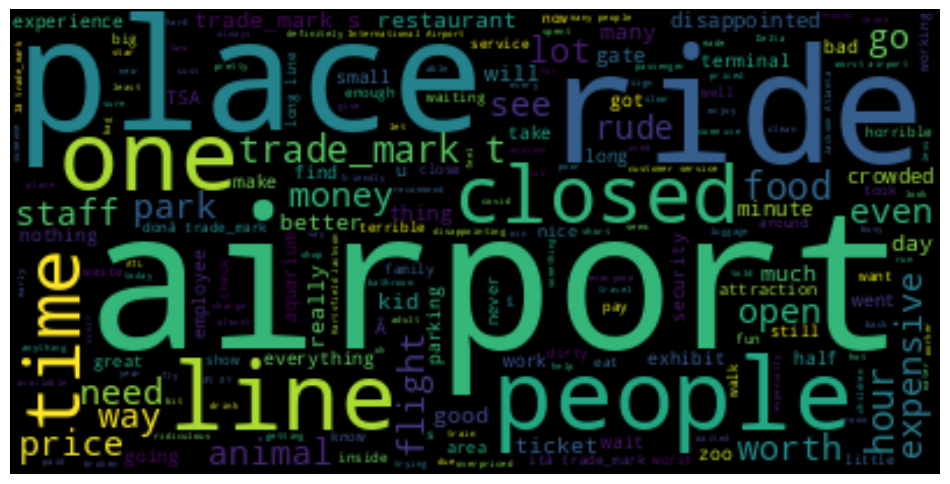

In [34]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
df_filtered.shape[0]

6633

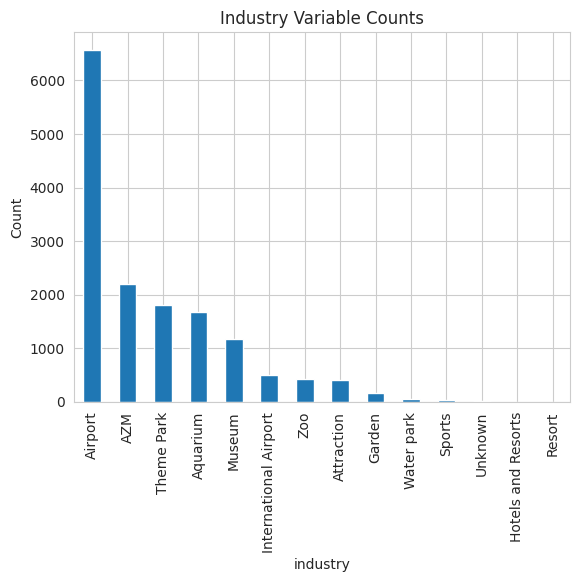

In [36]:
industry_counts = df['industry'].value_counts()
industry_counts.plot(kind='bar')
plt.title('Industry Variable Counts')
plt.xlabel('industry')
plt.ylabel('Count')
plt.show()

In [37]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# POS (Parts of Speech) Tagging

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Define a function to perform POS tagging on a sentence
def pos_tagging(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply the function to the DataFrame column
df['pos_tags'] = df['comment'].apply(pos_tagging)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [39]:
df.head(10)

,industry,comment,rating,manual_rating,diff,Rating_3P,Emoji_Extracted,Abbreviated_comment,pos_tags
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,0,1,[],Absolutely atrocious. If I could give zero sta...,"[(Absolutely, RB), (atrocious, JJ), (., .), (I..."
1,Airport,Almost all the restaurants close about 3 so if...,1,1,0,1,[],Almost all the restaurants close about 3 so if...,"[(Almost, RB), (all, PDT), (the, DT), (restaur..."
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,0,1,[],8pm Sunday evening and ALL restaurants are clo...,"[(8pm, CD), (Sunday, NNP), (evening, NN), (and..."
3,Airport,"It was a Night mare,in every way possible.",1,1,0,1,[],"It was a Night mare,in every way possible.","[(It, PRP), (was, VBD), (a, DT), (Night, NNP),..."
4,Airport,"Always busy, wait times are terrible.",1,1,0,1,[],"Always busy, wait times are terrible.","[(Always, NNP), (busy, JJ), (,, ,), (wait, JJ)..."
5,Airport,Very busy with no stopping had to ride the loo...,1,1,0,1,[],Very busy with no stopping had to ride the loo...,"[(Very, RB), (busy, JJ), (with, IN), (no, DT),..."
6,Airport,You say you are following CDC guidelines and y...,1,1,0,1,[],You say you are following CDC guidelines and y...,"[(You, PRP), (say, VBP), (you, PRP), (are, VBP..."
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,0,1,[],Your lucky if your plane is fit to fly out of ...,"[(Your, PRP$), (lucky, JJ), (if, IN), (your, P..."
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,0,1,[],The staff that works for Spirit Airlines is ve...,"[(The, DT), (staff, NN), (that, WDT), (works, ..."
9,Airport,Very unorganized and bad customer support,1,1,0,1,[],Very unorganized and bad customer support,"[(Very, RB), (unorganized, JJ), (and, CC), (ba..."


In [47]:
nltk.download('opinion_lexicon')
# Define a function to do POS tagging and return a list of adjectives
def get_adjectives(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    adjectives = [word for word, tag in tagged_tokens if tag.startswith('JJ')]
    return adjectives

# Apply the function to the dataframe to create a new column with adjectives
df['adjectives'] = df['comment'].apply(get_adjectives)

# Flatten the list of adjectives into a single list
all_adjectives = [adj for adj_list in df['adjectives'] for adj in adj_list]

# Create a frequency distribution of the adjectives
fdist = nltk.FreqDist(all_adjectives)

# Get the top 10 most frequent positive adjectives
positive_adjectives = [word for word, freq in fdist.most_common() if word in nltk.corpus.opinion_lexicon.positive()][:10]

# Get the top 10 most frequent negative adjectives
negative_adjectives = [word for word, freq in fdist.most_common() if word in nltk.corpus.opinion_lexicon.negative()][:10]

# Print the results
print('Top positive adjectives:', positive_adjectives)
print('Top negative adjectives:', negative_adjectives)

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


Top positive adjectives: ['good', 'great', 'nice', 'clean', 'easy', 'better', 'best', 'friendly', 'helpful', 'cool']
Top negative adjectives: ['expensive', 'bad', 'rude', 'disappointed', 'worst', 'hard', 'slow', 'crowded', 'horrible', 'terrible']


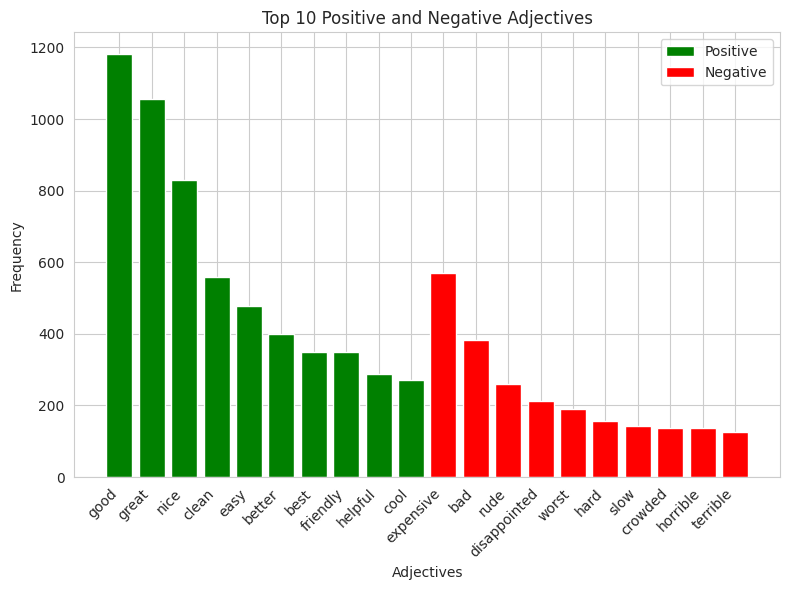

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import opinion_lexicon
from nltk import pos_tag
from collections import Counter

# define a function to get the adjectives from a sentence
def get_adjectives(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    adjectives = [word for word, pos in tagged_tokens if pos.startswith('JJ')]
    return adjectives

# get the top 10 most frequent positive adjectives
positive_adjectives = []
for sentence in df['comment']:
    adjectives = get_adjectives(sentence)
    positive_adjectives += [word for word in adjectives if word in opinion_lexicon.positive() and len(word) > 2]
freq_pos = Counter(positive_adjectives).most_common(10)

# get the top 10 most frequent negative adjectives
negative_adjectives = []
for sentence in df['comment']:
    adjectives = get_adjectives(sentence)
    negative_adjectives += [word for word in adjectives if word in opinion_lexicon.negative() and len(word) > 2]
freq_neg = Counter(negative_adjectives).most_common(10)

# plot the bar graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([x[0] for x in freq_pos], [x[1] for x in freq_pos], color='green', label='Positive')
ax.bar([x[0] for x in freq_neg], [x[1] for x in freq_neg], color='red', label='Negative')
ax.set_xlabel('Adjectives')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Positive and Negative Adjectives')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
df.head(10)

,industry,comment,rating,manual_rating,diff,Rating_3P,Emoji_Extracted,Abbreviated_comment,pos_tags
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,0,1,[],Absolutely atrocious. If I could give zero sta...,"[(Absolutely, RB), (atrocious, JJ), (., .), (I..."
1,Airport,Almost all the restaurants close about 3 so if...,1,1,0,1,[],Almost all the restaurants close about 3 so if...,"[(Almost, RB), (all, PDT), (the, DT), (restaur..."
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,0,1,[],8pm Sunday evening and ALL restaurants are clo...,"[(8pm, CD), (Sunday, NNP), (evening, NN), (and..."
3,Airport,"It was a Night mare,in every way possible.",1,1,0,1,[],"It was a Night mare,in every way possible.","[(It, PRP), (was, VBD), (a, DT), (Night, NNP),..."
4,Airport,"Always busy, wait times are terrible.",1,1,0,1,[],"Always busy, wait times are terrible.","[(Always, NNP), (busy, JJ), (,, ,), (wait, JJ)..."
5,Airport,Very busy with no stopping had to ride the loo...,1,1,0,1,[],Very busy with no stopping had to ride the loo...,"[(Very, RB), (busy, JJ), (with, IN), (no, DT),..."
6,Airport,You say you are following CDC guidelines and y...,1,1,0,1,[],You say you are following CDC guidelines and y...,"[(You, PRP), (say, VBP), (you, PRP), (are, VBP..."
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,0,1,[],Your lucky if your plane is fit to fly out of ...,"[(Your, PRP$), (lucky, JJ), (if, IN), (your, P..."
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,0,1,[],The staff that works for Spirit Airlines is ve...,"[(The, DT), (staff, NN), (that, WDT), (works, ..."
9,Airport,Very unorganized and bad customer support,1,1,0,1,[],Very unorganized and bad customer support,"[(Very, RB), (unorganized, JJ), (and, CC), (ba..."


In [41]:
# Word associations: Analyze co-occurring words or phrases in each sentiment category to understand the context in which certain words or phrases are used. 
# You can use techniques like association rule mining or co-occurrence matrix analysis.

# Co-occurance Matrix Analysis

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

df1 = df

# create a CountVectorizer object
cv = CountVectorizer(stop_words='english', lowercase=True)

# fit and transform the sentences column
sentences_matrix = cv.fit_transform(df1['comment'])

# create a pandas DataFrame from the co-occurrence matrix
co_occurrence = pd.DataFrame(sentences_matrix.T.dot(sentences_matrix).toarray(), index=cv.get_feature_names_out(), columns=cv.get_feature_names_out())

# remove diagonal values (words that co-occur with themselves)
np.fill_diagonal(co_occurrence.values, 0)

# print the top 10 most common word associations
print(co_occurrence.stack().sort_values(ascending=False)[:50])

trade_mark     itâ              744
itâ            trade_mark       744
airport        trade_mark       636
trade_mark     airport          636
airport        international    562
international  airport          562
ðÿ             trade_mark       554
trade_mark     ðÿ               554
food           airport          545
airport        food             545
               atlanta          523
atlanta        airport          523
airport        nice             518
nice           airport          518
easy           airport          460
airport        easy             460
people         airport          457
airport        people           457
               clean            446
clean          airport          446
airport        time             441
time           airport          441
airport        flight           437
flight         airport          437
tsa            airport          431
airport        tsa              431
iâ             trade_mark       428
trade_mark     iâ           

In [42]:
# Association Mining

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# split the sentences into lists of words
sentences = [sentence.split() for sentence in df1['comment']]

# create a transaction encoder object
te = TransactionEncoder()

# fit and transform the data
te_ary = te.fit(sentences).transform(sentences)
df1 = pd.DataFrame(te_ary, columns=te.columns_)

# generate frequent itemsets
frequent_itemsets = apriori(df1, min_support=0.05, use_colnames=True)

# generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# put the rules into a dataframe
rules_df = pd.DataFrame({
    'antecedents': rules['antecedents'].apply(lambda x: ', '.join(list(x))),
    'consequents': rules['consequents'].apply(lambda x: ', '.join(list(x))),
    'support': rules['support'],
    'confidence': rules['confidence'],
    'lift': rules['lift']
})

# print the rules dataframe
rules_df.head(10)


,antecedents,consequents,support,confidence,lift
0,I,the,0.161082,0.694628,1.239693
1,It,the,0.053694,0.667771,1.191763
2,It,was,0.052095,0.647887,2.502686
3,The,and,0.092932,0.606786,1.221464
4,The,the,0.108520,0.708569,1.264574
5,had,a,0.052428,0.627092,1.577820
6,a,the,0.250683,0.630741,1.125675
7,airport,the,0.075145,0.639456,1.141228
8,all,and,0.051629,0.632653,1.273536
9,all,the,0.063020,0.772245,1.378215


In [43]:
rules_df.tail(20)

,antecedents,consequents,support,confidence,lift
302,"is, to, the",and,0.071481,0.663164,1.334955
303,"and, is, to",the,0.071481,0.751401,1.341015
304,"and, it, to",the,0.050763,0.768145,1.370898
305,"the, it, to",and,0.050763,0.679144,1.367123
306,"and, it, the",to,0.050763,0.695255,1.399742
307,"of, and, the",to,0.093465,0.638598,1.285675
308,"of, to, the",and,0.093465,0.666508,1.341687
309,"of, and, to",the,0.093465,0.796254,1.421064
310,"was, of, and",the,0.051695,0.810021,1.445634
311,"was, of, the",and,0.051695,0.672444,1.353634


In [44]:
df.head(5)

,industry,comment,rating,manual_rating,diff,Rating_3P,Emoji_Extracted,Abbreviated_comment,pos_tags
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,0,1,[],Absolutely atrocious. If I could give zero sta...,"[(Absolutely, RB), (atrocious, JJ), (., .), (I..."
1,Airport,Almost all the restaurants close about 3 so if...,1,1,0,1,[],Almost all the restaurants close about 3 so if...,"[(Almost, RB), (all, PDT), (the, DT), (restaur..."
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,0,1,[],8pm Sunday evening and ALL restaurants are clo...,"[(8pm, CD), (Sunday, NNP), (evening, NN), (and..."
3,Airport,"It was a Night mare,in every way possible.",1,1,0,1,[],"It was a Night mare,in every way possible.","[(It, PRP), (was, VBD), (a, DT), (Night, NNP),..."
4,Airport,"Always busy, wait times are terrible.",1,1,0,1,[],"Always busy, wait times are terrible.","[(Always, NNP), (busy, JJ), (,, ,), (wait, JJ)..."


In [45]:
import pandas as pd
import nltk

# download the word tokenizer from NLTK
nltk.download('punkt')

# define a function to count the number of words in a string
def count_words(text):
    return len(nltk.word_tokenize(text))

# count the number of words in each review
df['num_words'] = df['comment'].apply(lambda x: count_words(x))

# calculate the total number of words in the entire DataFrame
total_words = df['num_words'].sum()

print(f'Total number of words: {total_words}')

df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total number of words: 469648


,industry,comment,rating,manual_rating,diff,Rating_3P,Emoji_Extracted,Abbreviated_comment,pos_tags,num_words
0,Airport,Absolutely atrocious. If I could give zero sta...,1,1,0,1,[],Absolutely atrocious. If I could give zero sta...,"[(Absolutely, RB), (atrocious, JJ), (., .), (I...",54
1,Airport,Almost all the restaurants close about 3 so if...,1,1,0,1,[],Almost all the restaurants close about 3 so if...,"[(Almost, RB), (all, PDT), (the, DT), (restaur...",29
2,Airport,8pm Sunday evening and ALL restaurants are clo...,1,1,0,1,[],8pm Sunday evening and ALL restaurants are clo...,"[(8pm, CD), (Sunday, NNP), (evening, NN), (and...",17
3,Airport,"It was a Night mare,in every way possible.",1,1,0,1,[],"It was a Night mare,in every way possible.","[(It, PRP), (was, VBD), (a, DT), (Night, NNP),...",11
4,Airport,"Always busy, wait times are terrible.",1,1,0,1,[],"Always busy, wait times are terrible.","[(Always, NNP), (busy, JJ), (,, ,), (wait, JJ)...",8
5,Airport,Very busy with no stopping had to ride the loo...,1,1,0,1,[],Very busy with no stopping had to ride the loo...,"[(Very, RB), (busy, JJ), (with, IN), (no, DT),...",23
6,Airport,You say you are following CDC guidelines and y...,1,1,0,1,[],You say you are following CDC guidelines and y...,"[(You, PRP), (say, VBP), (you, PRP), (are, VBP...",43
7,Airport,Your lucky if your plane is fit to fly out of ...,1,1,0,1,[],Your lucky if your plane is fit to fly out of ...,"[(Your, PRP$), (lucky, JJ), (if, IN), (your, P...",43
8,Airport,The staff that works for Spirit Airlines is ve...,1,1,0,1,[],The staff that works for Spirit Airlines is ve...,"[(The, DT), (staff, NN), (that, WDT), (works, ...",37
9,Airport,Very unorganized and bad customer support,1,1,0,1,[],Very unorganized and bad customer support,"[(Very, RB), (unorganized, JJ), (and, CC), (ba...",6


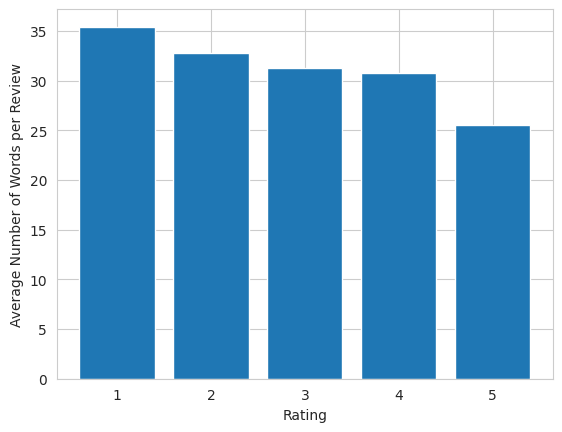

In [46]:
# code to create a graph where the x-axis is rating and y axis is average number of words per review 
import pandas as pd
import matplotlib.pyplot as plt

# calculate the average number of words per review for each rating level
avg_words = df.groupby('manual_rating')['num_words'].mean()

# create a bar chart of the average number of words per review by rating
plt.bar(avg_words.index, avg_words.values)
plt.xlabel('Rating')
plt.ylabel('Average Number of Words per Review')
plt.show()


## Hypothesis Tests 


In [47]:
# Those who are unhappy are more vocal about their bad experience

# To test whether those who gave a rating of 1 have a higher number of words per review, 
# You could use a two-sample t-test. 
# The null hypothesis would be that there is no difference in the mean number of words per review between those who gave a rating of 1 and those who gave a rating other than 1. 
# The alternative hypothesis would be that those who gave a rating of 1 have a higher mean number of words per review than those who gave a rating other than 1.

# Here's some sample code that performs a two-sample t-test and prints the result:

The mean number of words per review is significantly higher for those who gave a rating of 1.


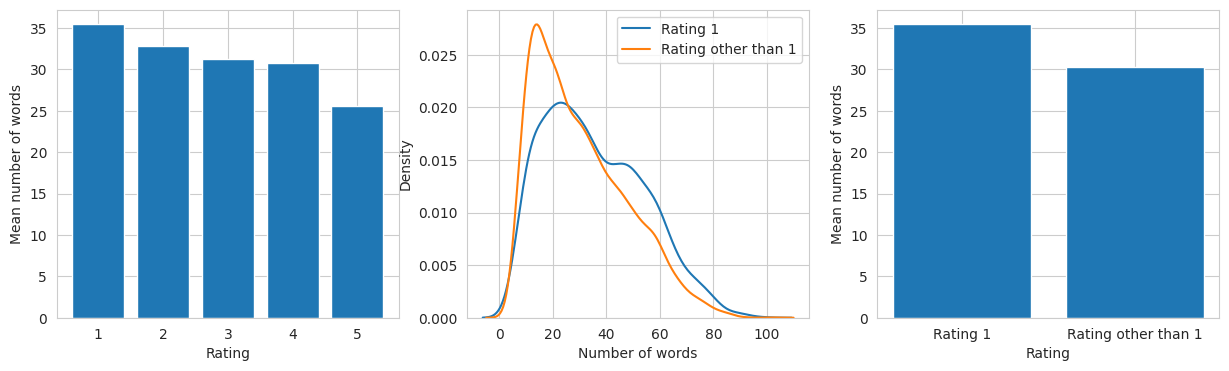

In [48]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the mean number of words per rating
means = df.groupby('manual_rating')['num_words'].mean()

# perform a two-sample t-test comparing the mean number of words for ratings of 1 vs. all other ratings
group1 = df[df['manual_rating'] == 1]['num_words']
group2 = df[df['manual_rating'] != 1]['num_words']
t_stat, p_value = stats.ttest_ind(group1, group2)

# print the results of the t-test
if p_value < 0.05:
    print('The mean number of words per review is significantly higher for those who gave a rating of 1.')
else:
    print('There is no significant difference in the mean number of words per review between those who gave a rating of 1 and those who gave a rating other than 1.')

# plot the mean number of words per rating
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
axs[0].bar(means.index, means)
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Mean number of words')

# plot the distribution of number of words per review for each group using seaborn
sns.distplot(group1, hist=False, label='Rating 1', ax=axs[1])
sns.distplot(group2, hist=False, label='Rating other than 1', ax=axs[1])
axs[1].set_xlabel('Number of words')
axs[1].set_ylabel('Density')
axs[1].legend()

# create a bar chart to display the mean number of words per review for each group
axs[2].bar(['Rating 1', 'Rating other than 1'], [group1.mean(), group2.mean()])
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Mean number of words')

plt.show()

The mean number of words per review is significantly higher for reviews without a rating of 5.


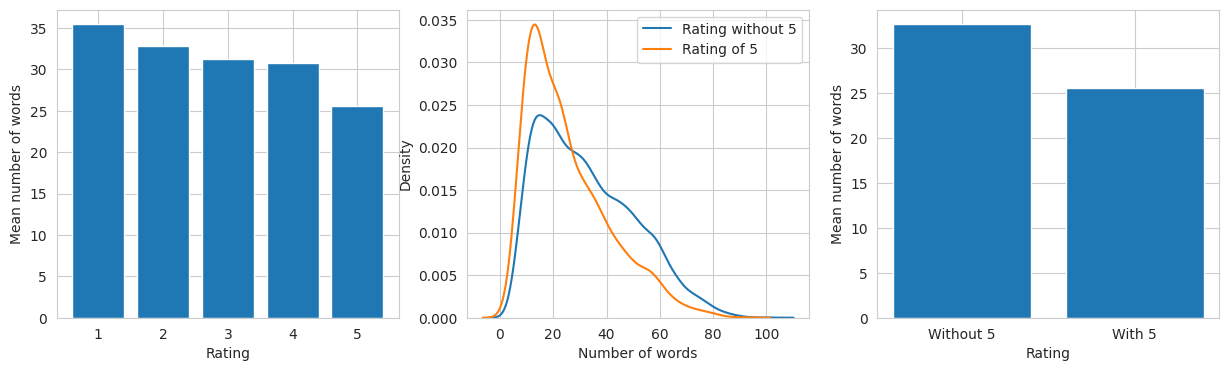

In [49]:
# Those who are happy are more not very vocal about their good experience

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the mean number of words per rating
means = df.groupby('manual_rating')['num_words'].mean()

# perform a two-sample t-test comparing the mean number of words for ratings without 5 vs. rating of 5
group1 = df[df['manual_rating'] != 5]['num_words']
group2 = df[df['manual_rating'] == 5]['num_words']
t_stat, p_value = stats.ttest_ind(group1, group2)

# print the results of the t-test
if p_value < 0.05:
    print('The mean number of words per review is significantly higher for reviews without a rating of 5.')
else:
    print('There is no significant difference in the mean number of words per review between the reviews without a rating of 5 and the reviews with a rating of 5.')

# plot the mean number of words per rating
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
axs[0].bar(means.index, means)
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Mean number of words')

# plot the distribution of number of words per review for each group using seaborn
sns.distplot(group1, hist=False, label='Rating without 5', ax=axs[1])
sns.distplot(group2, hist=False, label='Rating of 5', ax=axs[1])
axs[1].set_xlabel('Number of words')
axs[1].set_ylabel('Density')
axs[1].legend()

# create a bar chart to display the mean number of words per review for each group
axs[2].bar(['Without 5', 'With 5'], [group1.mean(), group2.mean()])
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Mean number of words')

plt.show()


In [50]:
# Mann-Whitney U test: This test can be used to compare the distribution of two groups of data that are not normally distributed, such as the sentiment scores of two different products.

import pandas as pd
import scipy.stats as stats

# separate the data by industry
industry1_data = df[df['industry'] == 'Airport']['manual_rating']
industry2_data = df[df['industry'] == 'AZM']['manual_rating']

# perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(industry1_data, industry2_data)

# print the results
if p_value < 0.05:
    print('There is a significant difference in the distribution of sentiment scores between the two industries.')
else:
    print('There is no significant difference in the distribution of sentiment scores between the two industries.')

There is no significant difference in the distribution of sentiment scores between the two industries.


There is a significant difference in sentiment scores across industries (p < 0.05)


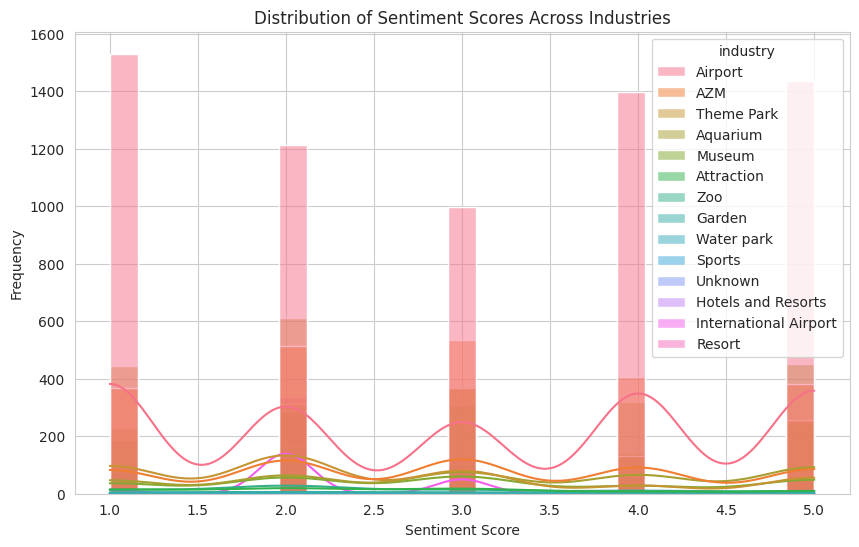

In [51]:
# Kruskal-Wallis test: This test is similar to the Mann-Whitney U test, but can be used to compare more than two groups.

import pandas as pd
import scipy.stats as stats

# group the data by industry and calculate the median sentiment score for each industry
grouped_data = df.groupby('industry')['manual_rating'].median()

# perform a Kruskal-Wallis test to compare sentiment scores across industries
statistic, p_value = stats.kruskal(*[group.values for name, group in df.groupby('industry')['manual_rating']])

# print the results of the test
if p_value < 0.05:
    print('There is a significant difference in sentiment scores across industries (p < 0.05)')
else:
    print('There is no significant difference in sentiment scores across industries (p >= 0.05)')

# create a distplot to visualize the distribution of sentiment scores for each industry
sns.set_style('whitegrid')
sns.set_palette('bright')
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x='manual_rating', hue='industry', kde=True, alpha=0.5, ax=ax)
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sentiment Scores Across Industries')

plt.show()


# Traditional / Statistical Models

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

# create a CountVectorizer object
count_vectorizer = CountVectorizer()

# Create a dictionary from the corpus
feature_vector = count_vectorizer.fit(df.comment)

# get the feature names
features = feature_vector.get_feature_names_out()

# print the feature names
print("Total number of features: ", len(features))

Total number of features:  14169


In [53]:
# Convert the above dictionary into countvectors using transform

df_features = count_vectorizer.transform(df.comment)

In [54]:
df_features.shape

(15011, 14169)

In [55]:
# To know how many non-zero values are present in the matrix we use the function getnnz()

df_features.getnnz()

333542

In [56]:
# Check how sparse the matrix is, divide the above number by the column row mul of the total matrix

(df_features.getnnz() / (df_features.shape[0]*df_features.shape[1]))*100

# The matrix is less than 1% non zero values, that is, more than 99% values are zeros. This is a very sparse representation

0.15682009164296054

In [57]:
# Convert the above matrix to a dataframe
df_features_df = pd.DataFrame(df_features.todense())
#Setting the column names to the features ie words
df_features_df.columns = features

In [58]:
df_features_df[['parking','is','easy','and','the', 'parking','fee','is','reasonable']][0:1]

,parking,is,easy,and,the,parking,fee,is,reasonable
0,0,4,0,2,4,0,0,4,0


Text(0, 0.5, 'Density')

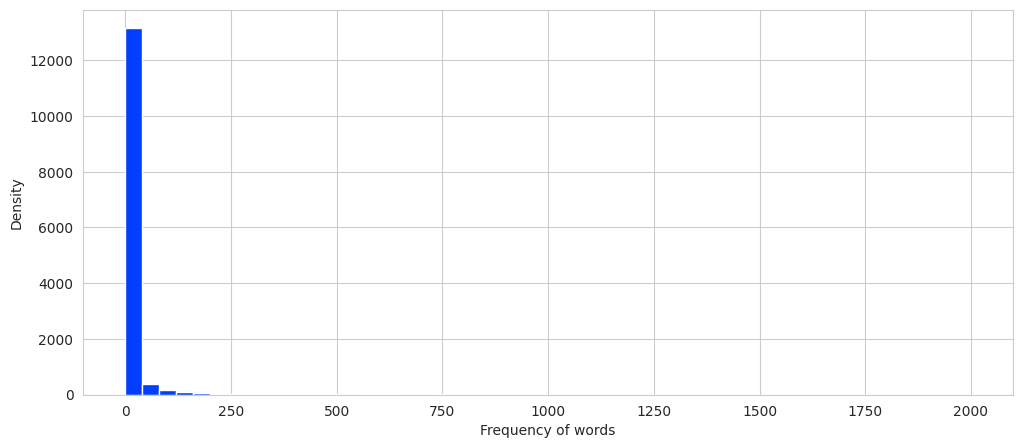

In [59]:
# Removing low frequency words
# Summing up the occurences of features columwise

features_counts = np.sum(df_features.toarray(), axis = 0)
feature_counts_df = pd.DataFrame(dict(features=features, counts = features_counts))

# Print a histogram
plt.figure(figsize = (12,5))
plt.hist(feature_counts_df.counts, bins = 50, range = (0,2000));
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [60]:
len(feature_counts_df[feature_counts_df.counts == 1])

6899

In [61]:
count_vectorizer = CountVectorizer (max_features = 1000)
feature_vector = count_vectorizer.fit(df.comment)
features = feature_vector.get_feature_names_out()
df_features = count_vectorizer.transform(df.comment)
features_counts = np.sum(df_features.toarray(), axis = 0)
feature_counts = pd.DataFrame(dict(features = features, counts = features_counts))

In [62]:
feature_counts.sort_values('counts', ascending = False)[0:15]

,features,counts
848,the,18170
872,to,12467
63,and,11536
456,it,6469
603,of,6455
359,for,5826
938,was,5815
452,is,5488
440,in,4697
599,not,3881


## Sentiment Analysis using Naive Bayes Model

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [64]:
# Shuffle the dataset
from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

In [65]:
# Preprocess the data
X = df['comment']
y = df['manual_rating']

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Transform the text data into a bag of words using CountVectorizer.
vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [68]:
# Train a Naive Bayes classifier on the training data.
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

MultinomialNB()

In [69]:
# Make predictions on the testing data.
y_pred = nb_classifier.predict(X_test_bow)

In [70]:
# Evaluate the performance of the classifier using accuracy score.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5124875124875125


In [71]:
# Print the classification report and confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred))
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.59      0.59       602
           2       0.47      0.52      0.50       762
           3       0.42      0.35      0.38       582
           4       0.42      0.41      0.42       490
           5       0.64      0.67      0.65       567

    accuracy                           0.51      3003
   macro avg       0.51      0.51      0.51      3003
weighted avg       0.51      0.51      0.51      3003

Naive Bayes Confusion Matrix:
[[353 188  40  11  10]
 [164 399 117  64  18]
 [ 49 174 205  97  57]
 [ 20  52  88 203 127]
 [ 13  27  36 112 379]]


In [72]:
# Preprocess the data
X = df['comment']
y = df['Rating_3P']

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Transform the text data into a bag of words using CountVectorizer.
vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [75]:
# Train a Naive Bayes classifier on the training data.
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

MultinomialNB()

In [76]:
# Make predictions on the testing data.
y_pred = nb_classifier.predict(X_test_bow)

In [77]:
# Evaluate the performance of the classifier using accuracy score.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7216117216117216


In [78]:
# Print the classification report and confusion matrix
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred))
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.85      0.80      1364
           2       0.47      0.20      0.28       582
           3       0.73      0.84      0.78      1057

    accuracy                           0.72      3003
   macro avg       0.65      0.63      0.62      3003
weighted avg       0.69      0.72      0.69      3003

Naive Bayes Confusion Matrix:
[[1164   82  118]
 [ 252  115  215]
 [ 123   46  888]]


#### Sentiment Analysis using TFIDF based LR method

In [79]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords

# Define X (text) and y (ratings) variables
X = df['comment']
y = df['manual_rating']

# Convert text to a TF-IDF vector
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Train a logistic regression model on the TF-IDF vectors
clf = LogisticRegression(max_iter=1000)
clf.fit(X_tfidf, y)

# Use the trained model to predict the sentiment of the text
df['TFIDF_LR_Rating_5P'] = clf.predict(X_tfidf)

# Print the classification report for the predicted ratings
print(classification_report(y, df['TFIDF_LR_Rating_5P']))


              precision    recall  f1-score   support

           1       0.80      0.81      0.80      3013
           2       0.70      0.77      0.73      3620
           3       0.71      0.65      0.68      2928
           4       0.74      0.63      0.68      2522
           5       0.82      0.87      0.85      2928

    accuracy                           0.75     15011
   macro avg       0.75      0.75      0.75     15011
weighted avg       0.75      0.75      0.75     15011



In [80]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define X (text) and y (ratings) variables
X = df['comment']
y = df['Rating_3P']

# Convert text to a TF-IDF vector
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Train a logistic regression model on the TF-IDF vectors
clf = LogisticRegression(max_iter=1000)
clf.fit(X_tfidf, y)

# Use the trained model to predict the sentiment of the text
df['TFIDF_LR_Rating_3P'] = clf.predict(X_tfidf)

# Print the classification report for the predicted ratings
print(classification_report(y, df['TFIDF_LR_Rating_3P']))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88      6633
           2       0.79      0.48      0.59      2928
           3       0.86      0.90      0.88      5450

    accuracy                           0.84     15011
   macro avg       0.83      0.77      0.79     15011
weighted avg       0.83      0.84      0.83     15011



## Machine Learning Models

#### LR + SVM

In [81]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [82]:
# Preprocess the data
X = df['comment']
y = df['manual_rating']

In [83]:
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [86]:
# Train the SVM model
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [87]:
# Evaluate the models

# Print the classification report for the predicted ratings
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60       602
           2       0.48      0.47      0.47       762
           3       0.43      0.44      0.44       582
           4       0.45      0.42      0.44       490
           5       0.67      0.73      0.70       567

    accuracy                           0.53      3003
   macro avg       0.53      0.53      0.53      3003
weighted avg       0.53      0.53      0.53      3003



In [88]:
print('SVM Metrics:')
print(classification_report(y_test, y_pred_svm))

SVM Metrics:
              precision    recall  f1-score   support

           1       0.57      0.58      0.58       602
           2       0.46      0.41      0.43       762
           3       0.36      0.38      0.37       582
           4       0.40      0.38      0.39       490
           5       0.64      0.71      0.67       567

    accuracy                           0.49      3003
   macro avg       0.49      0.49      0.49      3003
weighted avg       0.49      0.49      0.49      3003



In [89]:
# Preprocess the data
X = df['comment']
y = df['Rating_3P']

In [90]:
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [93]:
# Train the SVM model
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           1       0.81      0.82      0.81      1364
           2       0.46      0.37      0.41       582
           3       0.77      0.84      0.80      1057

    accuracy                           0.74      3003
   macro avg       0.68      0.68      0.68      3003
weighted avg       0.73      0.74      0.73      3003



In [95]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.79      0.78      0.79      1364
           2       0.40      0.36      0.38       582
           3       0.75      0.82      0.78      1057

    accuracy                           0.71      3003
   macro avg       0.65      0.65      0.65      3003
weighted avg       0.70      0.71      0.71      3003



#### LR + Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [97]:
# Preprocess the data
X = df['comment']
y = df['manual_rating']

In [98]:
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [101]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.58      0.54      0.56       602
           2       0.47      0.59      0.52       762
           3       0.44      0.34      0.38       582
           4       0.48      0.26      0.33       490
           5       0.60      0.81      0.69       567

    accuracy                           0.52      3003
   macro avg       0.51      0.51      0.50      3003
weighted avg       0.51      0.52      0.50      3003



In [103]:
# Preprocess the data
X = df['comment']
y = df['Rating_3P']

In [104]:
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [107]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           1       0.81      0.82      0.81      1364
           2       0.46      0.37      0.41       582
           3       0.77      0.84      0.80      1057

    accuracy                           0.74      3003
   macro avg       0.68      0.68      0.68      3003
weighted avg       0.73      0.74      0.73      3003



In [109]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.71      0.92      0.80      1364
           2       0.65      0.07      0.13       582
           3       0.73      0.82      0.78      1057

    accuracy                           0.72      3003
   macro avg       0.70      0.60      0.57      3003
weighted avg       0.71      0.72      0.66      3003



#### TFIDF + Random Forest

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [111]:
# Shuffle the dataset
df = shuffle(df, random_state=42)

In [112]:
# Preprocess the data
X = df['comment']
y = df['manual_rating']

In [113]:
# Convert text data into numerical data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.57      0.53      0.55       602
           2       0.42      0.63      0.50       711
           3       0.42      0.29      0.34       585
           4       0.53      0.23      0.32       522
           5       0.61      0.78      0.69       583

    accuracy                           0.50      3003
   macro avg       0.51      0.49      0.48      3003
weighted avg       0.51      0.50      0.49      3003



In [117]:
# Shuffle the dataset
df = shuffle(df, random_state=42)

In [118]:
# Preprocess the data
X = df['comment']
y = df['Rating_3P']

In [119]:
# Convert text data into numerical data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [120]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [122]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           1       0.69      0.92      0.79      1328
           2       0.58      0.06      0.10       560
           3       0.74      0.79      0.77      1115

    accuracy                           0.71      3003
   macro avg       0.67      0.59      0.55      3003
weighted avg       0.69      0.71      0.65      3003



## Pre-Trained Models 

#### Sentiment analysis using TextBlob

In [123]:
#!pip install textblob

In [124]:
from textblob import TextBlob

In [125]:
def sentiment_analysis_scale_1_to_5(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    sentiment = 0
    if polarity < -0.6:
        sentiment = 1
    elif polarity < -0.2:
        sentiment = 2
    elif polarity < 0.2:
        sentiment = 3
    elif polarity < 0.6:
        sentiment = 4
    else:
        sentiment = 5
    return sentiment

df['Rating_5P_Textblob'] = df['comment'].apply(sentiment_analysis_scale_1_to_5)

In [126]:
df.manual_rating.value_counts()

2    3620
1    3013
5    2928
3    2928
4    2522
Name: manual_rating, dtype: int64

In [127]:
df.Rating_5P_Textblob.value_counts()

3    6945
4    5327
2    1409
5    1066
1     264
Name: Rating_5P_Textblob, dtype: int64

In [128]:
df.loc[df['Rating_5P_Textblob'].isin([4, 5]), 'Rating_3P_Textblob'] = 3
df.loc[df['Rating_5P_Textblob'].isin([3]), 'Rating_3P_Textblob'] = 2
df.loc[df['Rating_5P_Textblob'].isin([2, 1]), 'Rating_3P_Textblob'] = 1

In [129]:
df['Rating_3P_Textblob'] = df['Rating_3P_Textblob'].astype('int64')

In [130]:
df.head(10)

,industry,comment,rating,manual_rating,diff,Rating_3P,Emoji_Extracted,Abbreviated_comment,pos_tags,num_words,TFIDF_LR_Rating_5P,TFIDF_LR_Rating_3P,Rating_5P_Textblob,Rating_3P_Textblob
14491,Theme Park,Had a great time. Lines were not too bad for t...,5,5,0,3,[],Had a great time. Lines were not too bad for t...,"[(Had, VBD), (a, DT), (great, JJ), (time, NN),...",22,2,3,4,3
174,Airport,Idc how many times I do it Hartsfield-Jackson ...,1,1,0,1,[],Idc how many times I do it Hartsfield-Jackson ...,"[(Idc, NNP), (how, WRB), (many, JJ), (times, N...",20,3,1,3,2
10630,Airport,Of course parking is crazy(it took a few minut...,4,4,0,3,[],Of course parking is crazy(it took a few minut...,"[(Of, IN), (course, NN), (parking, NN), (is, V...",72,3,1,3,2
1496,Airport,"Worst airport I've been in my life, spent 3 ho...",1,1,0,1,[],"Worst airport I have been in my life, spent 3 ...","[(Worst, NNP), (airport, NN), (I, PRP), ('ve, ...",29,1,1,2,1
405,Airport,Had a very terrible experience with Advantage ...,1,1,0,1,[],Had a very terrible experience with Advantage ...,"[(Had, VBD), (a, DT), (very, RB), (terrible, J...",29,1,1,1,1
2879,Aquarium,() They don&#39;t accept cash!! We couldn&#39;...,1,1,0,1,[],() They don&#39;t accept cash!! We couldn&#39;...,"[((, (), (), )), (They, PRP), (don, VBP), (&, ...",32,2,1,4,3
10560,Airport,Each time we use Bradley International Airport...,4,4,0,3,[],Each time we use Bradley International Airport...,"[(Each, DT), (time, NN), (we, PRP), (use, VBP)...",57,4,3,3,2
13595,AZM,() it&#39;s fun The Little Mermaid is the best...,5,5,0,3,[],() it&#39;s fun The Little Mermaid is the best...,"[((, (), (), )), (it, PRP), (&, CC), (#, #), (...",18,5,3,4,3
13419,Airport,The free waiting lot is the perfect solution f...,5,5,0,3,[],The free waiting lot is the perfect solution f...,"[(The, DT), (free, JJ), (waiting, NN), (lot, N...",13,5,3,5,3
190,Airport,Worst airport ever! Stood in TSA for two hours...,1,1,0,1,[],Worst airport ever! Stood in TSA for two hours...,"[(Worst, NNP), (airport, NN), (ever, RB), (!, ...",15,1,1,1,1


<Axes: >

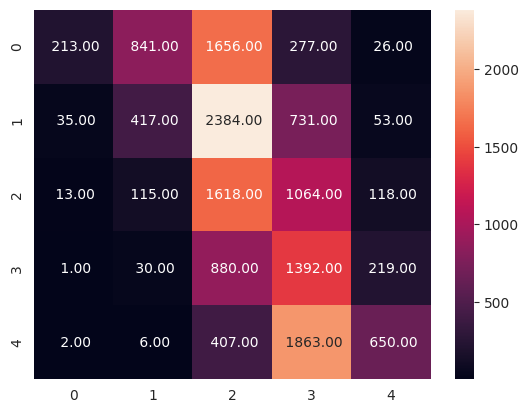

In [132]:
# CM on a five point scale

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.manual_rating, df.Rating_5P_Textblob)
# print(cm)
sns.heatmap(cm, annot = True, fmt = ' .2f')

<Axes: >

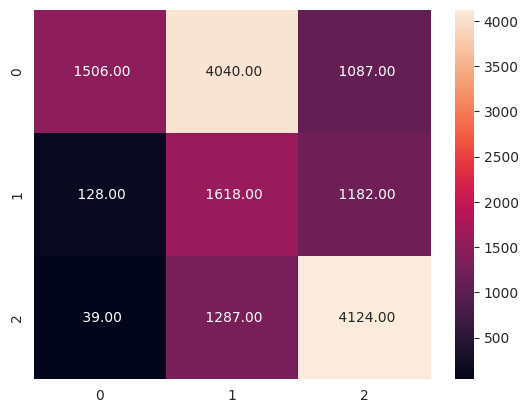

In [133]:
# CM on a three point scale

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.Rating_3P, df.Rating_3P_Textblob)
# print(cm)
sns.heatmap(cm, annot = True, fmt = ' .2f')

In [134]:
df.Rating_3P_Textblob.value_counts()

2    6945
3    6393
1    1673
Name: Rating_3P_Textblob, dtype: int64

In [135]:
df.Rating_3P.value_counts()

1    6633
3    5450
2    2928
Name: Rating_3P, dtype: int64

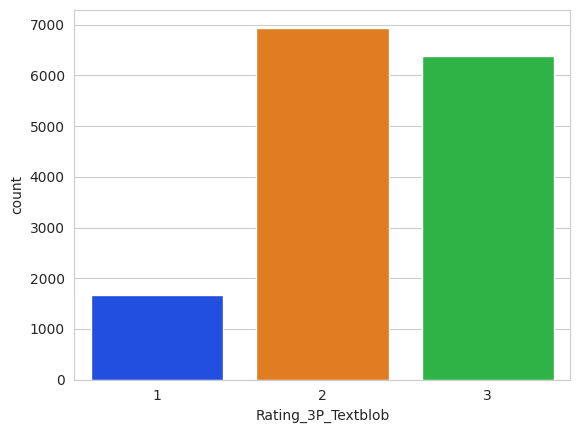

In [136]:
ax = sns.countplot( x='Rating_3P_Textblob',data=df)

In [137]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [138]:
# Calculate accuracy
accuracy = accuracy_score(df.manual_rating, df.Rating_5P_Textblob)

# Calculate sensitivity (also known as recall)
sensitivity = recall_score(df.manual_rating, df.Rating_5P_Textblob, average="weighted")

# Calculate specificity
specificity = recall_score(df.manual_rating, df.Rating_5P_Textblob, pos_label=0, average="weighted")

# Calculate F1 score
f1 = f1_score(df.manual_rating, df.Rating_5P_Textblob, average="weighted")

In [139]:
print(classification_report(df.manual_rating, df.Rating_5P_Textblob))

              precision    recall  f1-score   support

           1       0.81      0.07      0.13      3013
           2       0.30      0.12      0.17      3620
           3       0.23      0.55      0.33      2928
           4       0.26      0.55      0.35      2522
           5       0.61      0.22      0.33      2928

    accuracy                           0.29     15011
   macro avg       0.44      0.30      0.26     15011
weighted avg       0.44      0.29      0.25     15011



In [140]:
print(classification_report(df.manual_rating, df.Rating_3P_Textblob))

              precision    recall  f1-score   support

           1       0.63      0.35      0.45      3013
           2       0.34      0.66      0.45      3620
           3       0.18      0.40      0.25      2928
           4       0.00      0.00      0.00      2522
           5       0.00      0.00      0.00      2928

    accuracy                           0.31     15011
   macro avg       0.23      0.28      0.23     15011
weighted avg       0.25      0.31      0.25     15011



#### Sentiment analysis using vader

In [141]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.4 MB/s eta 0:00:00


In [142]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [143]:
analyzer = SentimentIntensityAnalyzer()

In [144]:
def sentiment_scores(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.75:
        return 5
    elif score >= 0.5 and score < 0.75:
        return 4
    elif score > 0 and score < 0.5:
        return 3
    elif score > -0.5 and score <= 0:
        return 2
    else:
        return 1

In [ ]:
df["Rating_5P_Vader"] = df["comment"].apply(sentiment_scores)

In [1]:
df.loc[df['Rating_5P_Vader'].isin([4, 5]), 'Rating_3P_Vader'] = 3
df.loc[df['Rating_5P_Vader'].isin([3]), 'Rating_3P_Vader'] = 2
df.loc[df['Rating_5P_Vader'].isin([2, 1]), 'Rating_3P_Vader'] = 1

NameError: ignored

In [ ]:
df['Rating_3P_Vader'] = df['Rating_3P_Vader'].astype('int64')

In [ ]:
# CM on a five point scale

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.Rating_5P, df.Rating_5P_Vader)
# print(cm)
sns.heatmap(cm, annot = True, fmt = ' .2f')

In [ ]:
# CM on a three point scale

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.Rating_3P, df.Rating_3P_Vader)
# print(cm)
sns.heatmap(cm, annot = True, fmt = ' .2f')

In [ ]:
print(metrics.classification_report(df.Rating_5P, df.Rating_5P_Vader))

In [ ]:
print(metrics.classification_report(df.Rating_3P, df.Rating_3P_Vader))

#### Sentiment Analysis using Pattern

In [ ]:
!pip install pattern

In [ ]:
from pattern.text.en import sentiment
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer

In [ ]:
# Shuffle the dataset
df = shuffle(df, random_state=42)

In [ ]:
# Separate the target variable and the feature data
X = df["comment"]
y = df["manual_rating"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the sentiment analysis function using the pattern library
class PatternSentiment(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Apply sentiment analysis to each document in X
        return [self._pattern_sentiment(text) for text in X]
    
    def _pattern_sentiment(self, text):
        # Get the sentiment score for the text
        score = sentiment(text)[0]
    
        # Determine the sentiment label based on the score and threshold
        if score >= self.threshold:
            label = 5
        elif score >= self.threshold/2:
            label = 4
        elif score >= 0:
            label = 3
        elif score >= -self.threshold/2:
            label = 2
        else:
            label = 1
        
        return label

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('sentiment', PatternSentiment(threshold=0.0)),
    # Add additional transformers and classifiers as needed
])

In [ ]:
# Define the parameter grid to search over
param_grid = {'sentiment__threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}

In [ ]:
# Define the scorer to use for the grid search
scorer = {'Accuracy': make_scorer(accuracy_score), 'Sensitivity': make_scorer(accuracy_score, pos_label=5)}

In [ ]:
# Perform the grid search using 5-fold cross-validation
#grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5, refit=False)

In [ ]:
# Fit the grid search to the training data
#grid_search.fit(X_train, y_train)

In [ ]:
# Print the results of the grid search
#results = pd.DataFrame(grid_search.cv_results_)
#print(results[['params', 'mean_test_Accuracy', 'mean_test_Sensitivity']])
#print('Best parameters:', grid_search.best_params_)

## Transformer based models


#### Using BERT base uncased

In [ ]:
import pandas as pd
!pip install transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline
from sklearn.metrics import classification_report

# Load the sentiment analysis model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

# Add the num_labels parameter to the pipeline method
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

# Apply the sentiment analysis pipeline to each sentence in the dataframe
sentiments = []
scores = []
for sentence in df['comment']:
    result = classifier(sentence)[0]
    sentiment = result['label']
    score = result['score']
    sentiments.append(sentiment)
    scores.append(score)

# Add the sentiment and score columns to the dataframe
df['BERT_Uncased_Rating_5P'] = sentiments
df['BERT_score'] = scores

# Print the classification report
report = classification_report(df['manual_rating'], df['BERT_Uncased_Rating_5P'], digits=3)
print(report)


In [ ]:
# replace all occurrences of 5 and 4 with 3 and 1 and 2 with 1
df.BERT_Uncased_Rating_5P = df.BERT_Uncased_Rating_5P.replace({LABEL_4: 5, LABEL_3: 4, LABEL_2: 3, LABEL_1: 2, LABEL_0: 1})

Using RoBERTa base

In [ ]:
import pandas as pd
# !pip install transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline
from sklearn.metrics import classification_report

# Load the sentiment analysis model
tokenizer = AutoTokenizer.from_pretrained('roberta-base')
model = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=5)

# Add the num_labels parameter to the pipeline method
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

# Apply the sentiment analysis pipeline to each sentence in the dataframe
sentiments = []
scores = []
for sentence in df['comment']:
    result = classifier(sentence)[0]
    sentiment = result['label']
    score = result['score']
    sentiments.append(sentiment)
    scores.append(score)

# Add the sentiment and score columns to the dataframe
df['BERT_Uncased_Rating_5P'] = sentiments
df['BERT_score'] = scores

# Print the classification report
report = classification_report(df['manual_rating'], df['BERT_Uncased_Rating_5P'], digits=3)
print(report)

## Distilbert

## ABSA

In [ ]:
import nltk
from textblob import TextBlob
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define aspect terms
aspects = ['service', 'food', 'ambiance', 'price']

# Define function to calculate sentiment for each aspect
def get_aspect_sentiment(text):
    blob = TextBlob(text)
    aspect_sentiments = {}
    for aspect in aspects:
        aspect_sentiments[aspect] = 0
        for sentence in blob.sentences:
            if aspect in sentence.lower():
                aspect_sentiments[aspect] += sentence.sentiment.polarity
    return aspect_sentiments

# Define function to calculate overall sentiment score on a 5-point scale
def get_sentiment_score(aspect_sentiments):
    total_sentiment = 0
    for aspect in aspects:
        total_sentiment += aspect_sentiments[aspect]
    avg_sentiment = total_sentiment / len(aspects)
    sentiment_score = round((avg_sentiment + 1) * 2.5)
    if sentiment_score == 0:
        sentiment_score = 1
    return sentiment_score

# Apply aspect-based sentiment analysis to each review
df['ABSA_sentiments'] = df['comment'].apply(get_aspect_sentiment)

# Calculate overall sentiment score on a 5-point scale
df['ABSA_sentiment_score'] = df['ABSA_sentiments'].apply(get_sentiment_score)

df.head(10)

In [ ]:
df.ABSA_sentiment_score.value_counts()

## Deep Learning 

#### LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# fit the tokenizer on the training data
tokenizer.fit_on_texts(train_data['comment'])

# convert text to sequence
train_seq = tokenizer.texts_to_sequences(train_data['comment'])
test_seq = tokenizer.texts_to_sequences(test_data['comment'])

# pad sequences
max_len = 100
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

# define the model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert ratings to categorical values
train_ratings = tf.keras.utils.to_categorical(train_data['manual_rating'] - 1, num_classes=5)
test_ratings = tf.keras.utils.to_categorical(test_data['manual_rating'] - 1, num_classes=5)

# train the model
history = model.fit(train_pad, train_ratings, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_pad, test_ratings)
print('Test accuracy:', test_acc)

# predict the sentiment of test data
test_pred = np.argmax(model.predict(test_pad), axis=-1) + 1

# print classification report
print(classification_report(test_data['manual_rating'], test_pred))


#### Using Bidirectional LSTM (BiLSTM)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# fit the tokenizer on the training data
tokenizer.fit_on_texts(train_data['comment'])

# convert text to sequence
train_seq = tokenizer.texts_to_sequences(train_data['comment'])
test_seq = tokenizer.texts_to_sequences(test_data['comment'])

# pad sequences
max_len = 100
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

# define the BiLSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert ratings to categorical values
train_ratings = tf.keras.utils.to_categorical(train_data['Rating_5P'] - 1, num_classes=5)
test_ratings = tf.keras.utils.to_categorical(test_data['Rating_5P'] - 1, num_classes=5)

# train the model
history = model.fit(train_pad, train_ratings, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_pad, test_ratings)
print('Test accuracy:', test_acc)

# predict the sentiment of test data
test_pred = np.argmax(model.predict(test_pad), axis=-1) + 1

# print classification report
print(classification_report(test_data['manual_rating'], test_pred))


#### Using Convolutional Neural Networks (CNN)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# fit the tokenizer on the training data
tokenizer.fit_on_texts(train_data['comment'])

# convert text to sequence
train_seq = tokenizer.texts_to_sequences(train_data['comment'])
test_seq = tokenizer.texts_to_sequences(test_data['comment'])

# pad sequences
max_len = 100
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

# define the CNN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert ratings to categorical values
train_ratings = tf.keras.utils.to_categorical(train_data['manual_rating'] - 1, num_classes=5)
test_ratings = tf.keras.utils.to_categorical(test_data['manual_rating'] - 1, num_classes=5)

# train the model
history = model.fit(train_pad, train_ratings, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_pad, test_ratings)
print('Test accuracy:', test_acc)

# predict the sentiment of test data
test_pred = np.argmax(model.predict(test_pad), axis=-1) + 1

# print classification report
print(classification_report(test_data['manual_rating'], test_pred))


#### Using Rerurrent Neural Networks (RNN)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# fit the tokenizer on the training data
tokenizer.fit_on_texts(train_data['comment'])

# convert text to sequence
train_seq = tokenizer.texts_to_sequences(train_data['comment'])
test_seq = tokenizer.texts_to_sequences(test_data['comment'])

# pad sequences
max_len = 100
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

# define the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert ratings to categorical values
train_ratings = tf.keras.utils.to_categorical(train_data['manual_rating'] - 1, num_classes=5)
test_ratings = tf.keras.utils.to_categorical(test_data['manual_rating'] - 1, num_classes=5)

# train the model
history = model.fit(train_pad, train_ratings, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_pad, test_ratings)
print('Test accuracy:', test_acc)

# predict the sentiment of test data
test_pred = np.argmax(model.predict(test_pad), axis=-1) + 1

# print classification report
print(classification_report(test_data['maual_rating'], test_pred))


# Categorization 

## Topic Modeling

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

# Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing stopwords and special characters
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    return tokens

docs = df['Statement'].apply(preprocess).tolist()

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Build the dictionary and corpus
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Set the number of topics
num_topics = 5

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, 
                     alpha='auto', eta='auto', passes=10, iterations=100)

# Compute the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

# Print the topics
for idx, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))


### Zero Shot Classification

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import pipeline

# define the zero-shot classification pipeline
classifier = pipeline('zero-shot-classification', device=0)

# define the candidate labels for classification
labels = ["Accessibility", "Website", "Bathrooms", "Cleanliness", "Crowd", "Discount", "Maintenence", "Parking", "Price", "Smoking", "Staff", "Restaurant"]

# define a function to classify the text
def classify_text(text):
    result = classifier(text, labels)
    return result['labels'][np.argmax(result['scores'])]

# apply the function to the 'text' column and create a new column for the classification result
df['zeroshot'] = df['comment'].apply(lambda x: classify_text(x))

df.head(10)

Named Entity Recognition

In [ ]:
# To assist the SME on the Net / Sub-Net entities

import pandas as pd
import spacy

# Load the spaCy model for named entity recognition
nlp = spacy.load('en_core_web_sm')

# Define a function to perform NER on a single review
def perform_ner(review):
    doc = nlp(review)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

# Apply the NER function to the dataframe
df['Entities'] = df['comment'].apply(perform_ner)

# Print the results
print(df.head())

In [ ]:
df.head(20)